# Visualizations of REFIT Electrical Load Measurements Dataset

Sample python code using the REFIT Electrical Load Measurements Dataset.

Dataset from: https://pure.strath.ac.uk/portal/en/datasets/refit-electrical-load-measurements-cleaned(9ab14b0e-19ac-4279-938f-27f643078cec).html

The following code explores the structure of the data, imports the data into pandas timeseries, and provides common visualizations.

To run the notebook interactively, the above mentioned dataset is assumed to be placed in `./data` directory relative to the location of this notebook file.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

## Format of the Dataset
- Each household has a `csv` file
- Contains timestamps, aggregated reading in watts, and disaggregated readings for each applicance
    - Note that certain "Applicances" might actually be the reading of several actual applicances measured together
    - There's a metadata file containing the actual labels for each "Appliance" that you can download. The labels are different for each household.

In [2]:
# Each CSV File is organized like this
df = pd.read_csv('data/House_2.csv', index_col=0, parse_dates=True)
df.head()

,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9
Time,,,,,,,,,,,
2013-09-17 22:08:11,1379455691,695,88,0,0,0,0,0,0,0,0
2013-09-17 22:08:18,1379455698,694,88,0,0,0,0,0,0,0,0
2013-09-17 22:08:26,1379455706,694,88,0,0,0,0,0,0,0,0
2013-09-17 22:08:34,1379455714,702,88,0,0,0,0,0,0,0,0
2013-09-17 22:08:42,1379455722,700,88,0,0,0,0,0,0,0,0


## Group by hour of the day
Take *House 2* as a sample.

In [3]:
# Prepare to visualize usage of different applicances in different hours of a day
by_hours_df = df.iloc[:, 2:].groupby(df.index.hour).mean()
# Rename the applicances according to the metadata provided, for more readability
by_hours_df = by_hours_df.rename(index=str, columns={
    "Appliance1":"Fridge-Freezer",
    "Appliance2":"Washing Machine",
    "Appliance3":"Dishwasher",
    "Appliance4":"Television Site",
    "Appliance5":"Microwave",
    "Appliance6":"Toaster",
    "Appliance7":"Hi-Fi",
    "Appliance8":"Kettle",
    "Appliance9":"Overhead Fan"
})
# The data frame aggregated by hours of a day looks like:
by_hours_df

,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
Time,,,,,,,,,
0,32.330488,1.572041,14.985462,0.391594,0.125233,0.646019,1.219927,0.469317,0.000000
1,31.067646,0.190543,14.080552,0.155499,0.235514,0.374369,1.205400,0.206796,0.000000
2,30.649989,0.064937,11.371142,0.016027,0.065551,0.240712,1.188267,0.261926,0.007042
3,29.148615,0.100833,10.332811,0.000008,0.082453,0.067165,1.196434,0.120730,0.006707
4,29.012979,2.741762,10.244129,0.001074,0.062912,0.149652,1.165770,0.427566,0.000285
5,27.235632,1.925993,6.993955,0.046350,0.066343,0.127907,1.172642,1.823169,0.000904
6,33.253835,8.127012,12.258302,4.221938,1.227343,1.865030,1.092780,53.050382,0.000201
7,36.524525,19.245614,43.036107,15.042028,3.298376,5.543519,1.236295,60.390524,0.000437
8,35.550439,50.492202,77.484916,17.334720,4.572724,2.351656,1.518976,19.870745,0.118144


## Sample Stacked Area Chart
- A sample stacked area chart showing the (averaged) readings of each appliance in each hour of a day

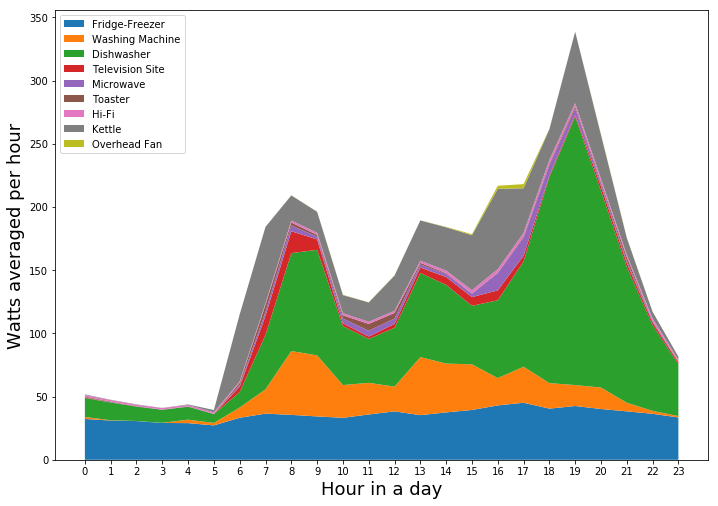

In [4]:
# Set size of plot
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
# Stackplot
ax.stackplot(list(range(24)), np.transpose(by_hours_df.values), labels=by_hours_df.columns.values)
plt.xlabel('Hour in a day', fontsize=18)
plt.ylabel('Watts averaged per hour', fontsize=18)
plt.xticks(np.arange(0, 24, 1.0))
ax.legend(loc=2)

## Active hours of different appliances

Text(0.5,1,'Kettle')

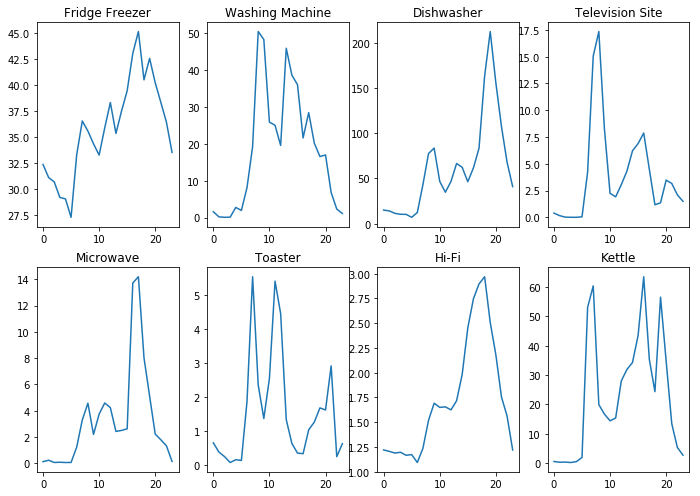

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

plt.subplot(241)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['Fridge-Freezer'].values)
plt.title('Fridge Freezer')

plt.subplot(242)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['Washing Machine'].values)
plt.title('Washing Machine')

plt.subplot(243)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['Dishwasher'].values)
plt.title('Dishwasher')

plt.subplot(244)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['Television Site'].values)
plt.title('Television Site')

plt.subplot(245)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['Microwave'].values)
plt.title('Microwave')

plt.subplot(246)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['Toaster'].values)
plt.title('Toaster')

plt.subplot(247)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['Hi-Fi'].values)
plt.title('Hi-Fi')

plt.subplot(248)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['Kettle'].values)
plt.title('Kettle')